<a href="https://colab.research.google.com/github/lilyzhizhou/Datathon-4/blob/main/Datathon_4_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load in data
# Lily
data_raw = pd.read_csv('/content/drive/MyDrive/Machine Learning /Datathon #4/datathon4.csv')


In [ ]:
#data_raw.columns.tolist()

In [ ]:
#data_raw = data_raw.sort_values('Patient_ID')
print(data_raw.shape)
data_raw.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

Filter by:
- icu_admit-source = Accident & Emergency

Comparison of how accurate our model is:
- apache 2 score
- apache 3 score

Outcome variable:
- hospital_death

Variables to keep:
- age
- bmi
- ethnicity
- gender
- admission from the ED
- all apache related variables



Filter data

---



In [ ]:
columns_to_keep = data_raw.columns[data_raw.columns.str.contains('apache')].tolist() + ['hospital_death',
                                                                                        'age',
                                                                                        'bmi',
                                                                                        'ethnicity',
                                                                                        'gender',
                                                                                        'icu_admit_source',
                                                                                        'aids',
                                                                                        'cirrhosis',
                                                                                        'diabetes_mellitus',
                                                                                        'hepatic_failure',
                                                                                        'immunosuppression',
                                                                                        'leukemia',
                                                                                        'lymphoma',
                                                                                        'solid_tumor_with_metastasis']
data = data_raw[columns_to_keep]

# remove other variables
data = data.drop(['apache_2_diagnosis','apache_3j_diagnosis','apache_4a_hospital_death_prob',
                  'apache_4a_icu_death_prob','apache_3j_bodysystem','apache_2_bodysystem'], axis = 1)

print(data.shape)
data.head()

(91713, 40)


,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,ethnicity,gender,icu_admit_source,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,2.3,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,0,68.0,22.73,Caucasian,M,Floor,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,0,77.0,27.42,Caucasian,F,Floor,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,0,25.0,31.95,Caucasian,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1.0,8.0,0,81.0,22.64,Caucasian,F,Operating Room / Recovery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,0,19.0,NaN,Caucasian,M,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Filter to only have those who were admitted straight from admission
data = data[data['icu_admit_source'] == 'Accident & Emergency']
data['icu_admit_source'].value_counts()

Accident & Emergency    54060
Name: icu_admit_source, dtype: int64

In [ ]:
# Drop admit source
data = data.drop('icu_admit_source', axis = 1)

- we now have 38 predictor variables, 1 outcome variable
- 54,000 observations



Checking for NA values

---



In [ ]:
missing_count = data.isna().sum()
total_count = len(data)
missing_percentage = (missing_count / total_count) * 100

missing_info = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage.round(0)})
print(missing_info.sort_values(by='Missing Percentage', ascending=False))

                             Missing Count  Missing Percentage
ph_apache                            44326                82.0
fio2_apache                          44326                82.0
pao2_apache                          44326                82.0
paco2_for_ph_apache                  44326                82.0
paco2_apache                         44326                82.0
bilirubin_apache                     32849                61.0
albumin_apache                       30713                57.0
urineoutput_apache                   27025                50.0
wbc_apache                           14088                26.0
hematocrit_apache                    12965                24.0
creatinine_apache                    11173                21.0
bun_apache                           11303                21.0
sodium_apache                        11009                20.0
glucose_apache                        6744                12.0
age                                   2613             

Re-encode categorical variables

---



In [ ]:
# Ethnicity categories
data['ethnicity'].value_counts()

Caucasian           41167
African American     5991
Other/Unknown        2670
Hispanic             2188
Asian                 669
Native American       525
Name: ethnicity, dtype: int64

In [ ]:
# one hot encode ethnicity variable
data = pd.get_dummies(data, columns=['ethnicity'], prefix='ethnicity')

data.head()

,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,gender,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,NaN,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,0,25.0,31.95,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,0,19.0,NaN,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
5,NaN,0,0.0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,NaN,NaN,NaN,NaN,35.0,137.0,36.6,NaN,0.0,10.9,0,67.0,27.56,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
6,NaN,0,0.0,NaN,18.0,0.78,1.0,4.0,6.0,0.0,5.0,197.0,133.0,33.5,1.0,138.0,43.0,43.0,370.0,7.42,53.0,135.0,35.0,NaN,1.0,5.9,0,59.0,57.45,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
7,NaN,0,0.0,NaN,48.0,2.05,NaN,4.0,6.0,0.0,5.0,164.0,120.0,22.6,0.0,60.0,NaN,NaN,NaN,NaN,28.0,140.0,36.6,NaN,1.0,12.8,0,70.0,NaN,M,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0


In [ ]:
data.columns

Index(['albumin_apache', 'apache_post_operative', 'arf_apache',
       'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache',
       'sodium_apache', 'temp_apache', 'urineoutput_apache',
       'ventilated_apache', 'wbc_apache', 'hospital_death', 'age', 'bmi',
       'gender', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ethnicity_African American',
       'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown'],
      dtype='object')

In [ ]:
# create list of variables
high_missing = missing_info[missing_info['Missing Percentage'] >= 50].index.tolist()

target_column = 'hospital_death'
categorical_columns = ['apache_post_operative','arf_apache','gcs_unable_apache',
                       'intubated_apache','ventilated_apache','aids','cirrhosis',
                       'diabetes_mellitus','hepatic_failure','immunosuppression',
                       'leukemia','lymphoma','solid_tumor_with_metastasis','gender',
                       'ethnicity_African American','ethnicity_Asian',
                       'ethnicity_Caucasian','ethnicity_Hispanic','ethnicity_Native American',
                       'ethnicity_Other/Unknown']

all_columns = data.columns
numerical_columns = [col for col in all_columns if col != target_column and col not in categorical_columns]

In [ ]:
# Convert numeric categorical variables into descriptive categories
data_dscrpt = data

data_dscrpt['hospital_death'].replace({0.0 : 'No Death', 1.0 : 'Death'}, inplace=True)

# Convert selected columns to string
data_dscrpt[categorical_columns] = data_dscrpt[categorical_columns].astype(str)
data_dscrpt[categorical_columns] = data_dscrpt[categorical_columns].replace({'0.0': 'No', '1.0': 'Yes'})
data_dscrpt[categorical_columns] = data_dscrpt[categorical_columns].replace({'0': 'No', '1': 'Yes'})

data_dscrpt.head()

,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,gender,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,NaN,No,No,NaN,NaN,NaN,NaN,3.0,6.0,No,5.0,NaN,102.0,NaN,No,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,No,NaN,No Death,25.0,31.95,F,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
4,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,60.0,NaN,No,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,No,NaN,No Death,19.0,NaN,M,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
5,NaN,No,No,NaN,13.0,0.71,NaN,4.0,6.0,No,5.0,156.0,113.0,44.2,No,130.0,NaN,NaN,NaN,NaN,35.0,137.0,36.6,NaN,No,10.9,No Death,67.0,27.56,M,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
6,NaN,No,No,NaN,18.0,0.78,1.0,4.0,6.0,No,5.0,197.0,133.0,33.5,Yes,138.0,43.0,43.0,370.0,7.42,53.0,135.0,35.0,NaN,Yes,5.9,No Death,59.0,57.45,F,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
7,NaN,No,No,NaN,48.0,2.05,NaN,4.0,6.0,No,5.0,164.0,120.0,22.6,No,60.0,NaN,NaN,NaN,NaN,28.0,140.0,36.6,NaN,Yes,12.8,No Death,70.0,NaN,M,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No


Data Exploration

---



In [ ]:
# Checking for death imbalance

# Compute the count of each class in the 'target' column
counts = data_dscrpt['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

very imbalanced dataset
- will need to add more weighting to the death data

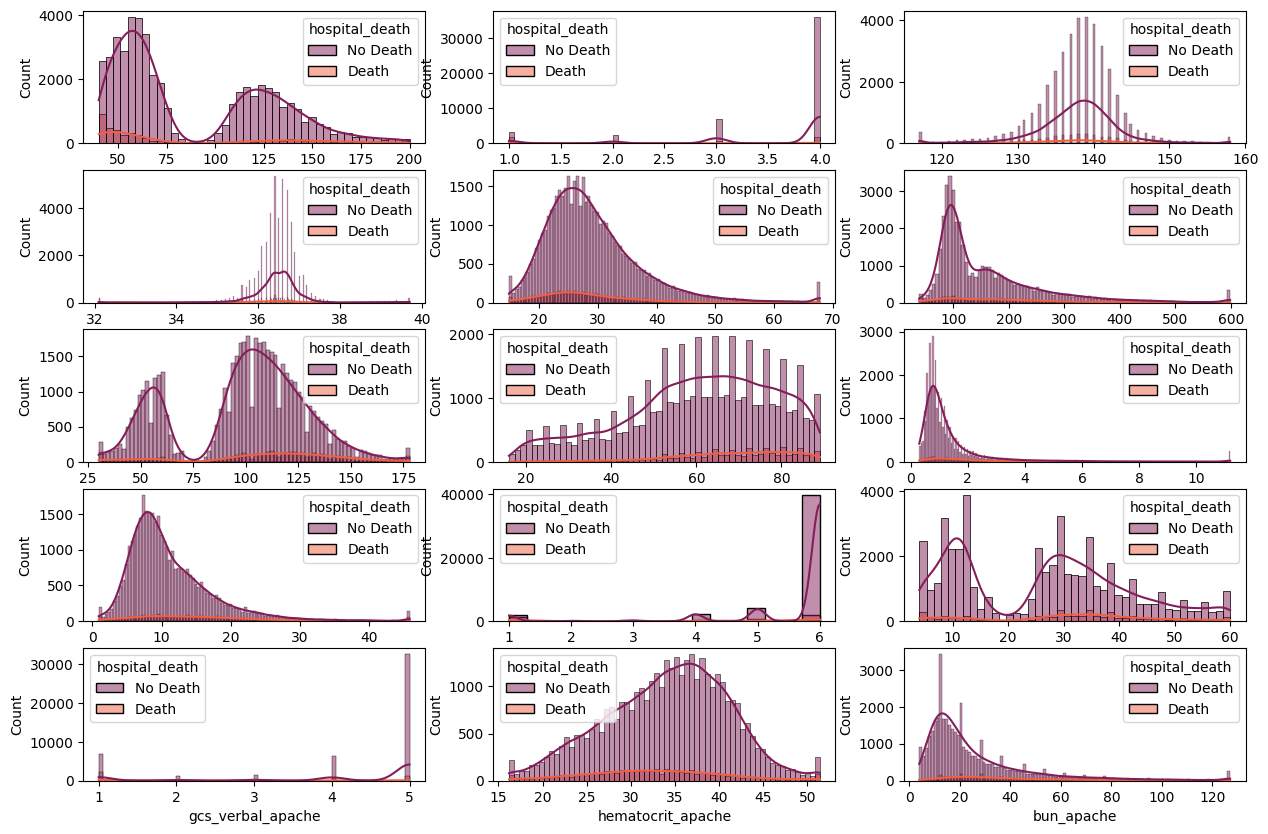

In [ ]:
# checking the difference in distribution of numerical features in two classes

remaining_numerical_columns = list(set(numerical_columns) - set(high_missing))
len(remaining_numerical_columns) #15

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 15))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(remaining_numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_dscrpt, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

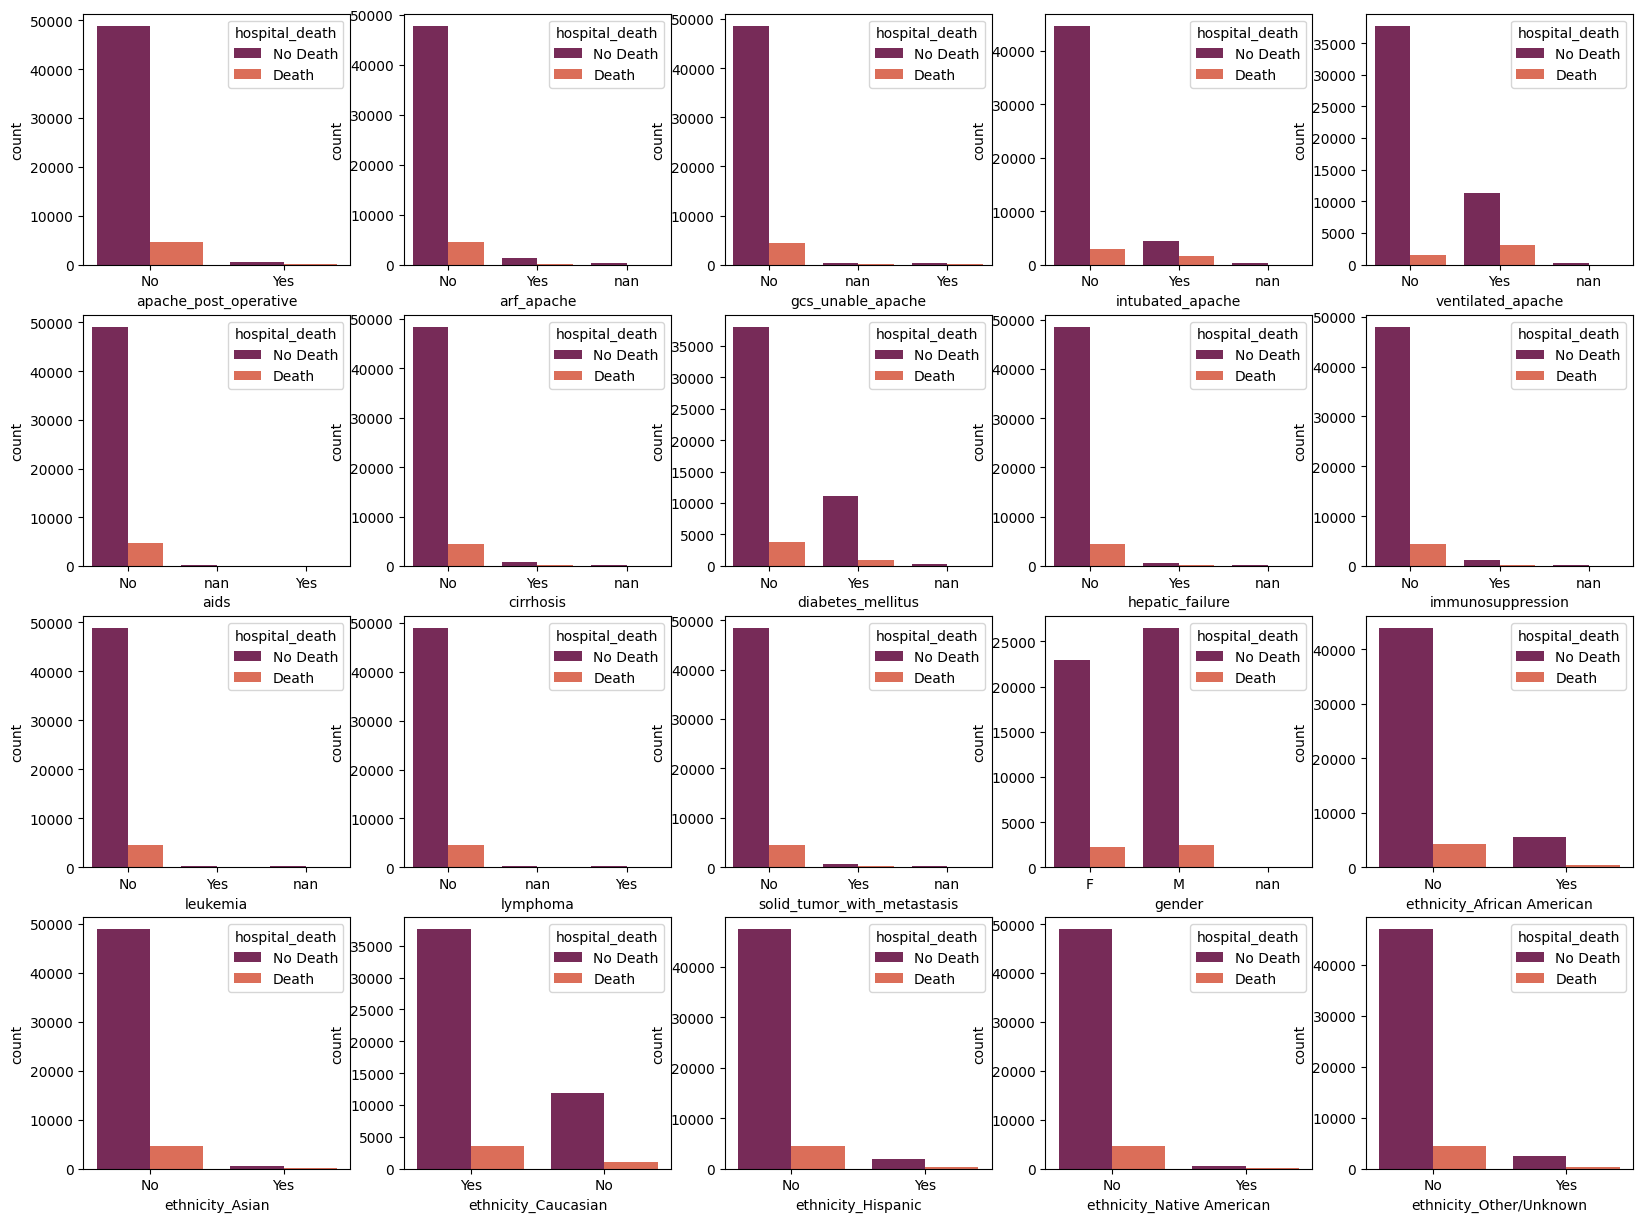

In [ ]:
# checking the difference in distribution of categorical features in two classes
len(categorical_columns) # 20

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 15))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(categorical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 5
    y = i % 5

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.countplot(data_dscrpt, x=column, hue= target_column, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

Correlation with numerical variables

---



<Axes: >

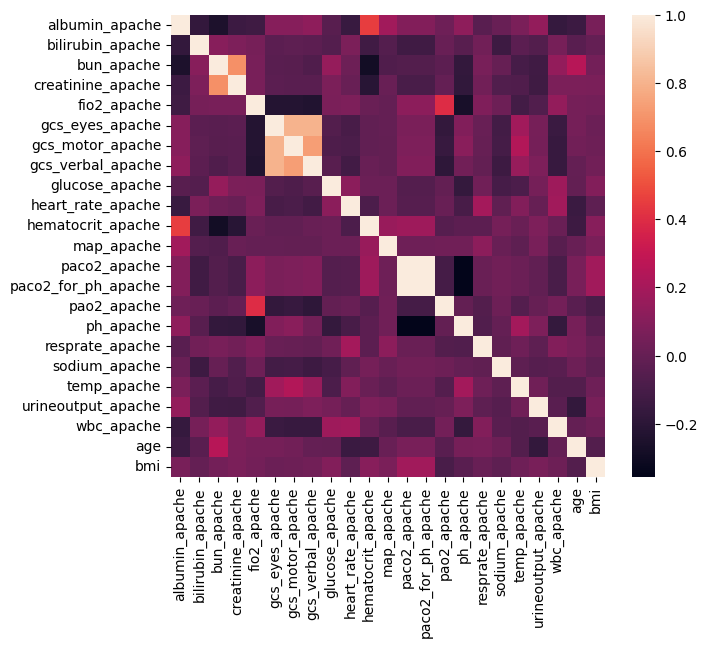

In [ ]:
# correlation matrix
columns = numerical_columns + [target_column]

plt.figure(figsize=(7,6))
sns.heatmap(data[columns].corr())

What are the differences for with high missing values

---



In [ ]:
na = data_dscrpt[data_dscrpt[high_missing].isna().any(axis=1)]

# Compute the count of each class in the 'target' column
counts = na['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

The distribution of pts with missing values is the same as the overall
- should be ok to remove variables that have over 50% missing

In [ ]:
# Drop Variables missing 50% or more
data = data.drop(columns=high_missing)

print(data.shape)
data

(54060, 36)


,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,gender,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,No,No,NaN,NaN,3.0,6.0,No,5.0,NaN,102.0,NaN,No,68.0,37.0,NaN,36.7,No,NaN,No Death,25.0,31.950000,F,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
4,No,No,NaN,NaN,NaN,NaN,nan,NaN,NaN,60.0,NaN,No,103.0,16.0,NaN,36.7,No,NaN,No Death,19.0,NaN,M,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
5,No,No,13.0,0.71,4.0,6.0,No,5.0,156.0,113.0,44.2,No,130.0,35.0,137.0,36.6,No,10.90,No Death,67.0,27.560000,M,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
6,No,No,18.0,0.78,4.0,6.0,No,5.0,197.0,133.0,33.5,Yes,138.0,53.0,135.0,35.0,Yes,5.90,No Death,59.0,57.450000,F,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
7,No,No,48.0,2.05,4.0,6.0,No,5.0,164.0,120.0,22.6,No,60.0,28.0,140.0,36.6,Yes,12.80,No Death,70.0,NaN,M,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91705,No,No,15.0,0.80,4.0,6.0,No,5.0,240.0,88.0,NaN,No,54.0,13.0,134.0,36.4,No,NaN,No Death,67.0,28.876843,M,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No
91706,No,No,15.0,0.70,4.0,6.0,No,5.0,91.0,55.0,41.0,No,62.0,12.0,139.0,36.6,No,7.14,No Death,54.0,19.770448,M,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
91707,No,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,No Death,NaN,33.933518,F,nan,nan,nan,nan,nan,nan,nan,nan,No,No,Yes,No,No,No
91710,No,No,33.0,2.30,3.0,6.0,No,4.0,538.0,158.0,36.0,No,57.0,4.0,135.0,35.8,No,17.55,No Death,48.0,27.236914,M,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No


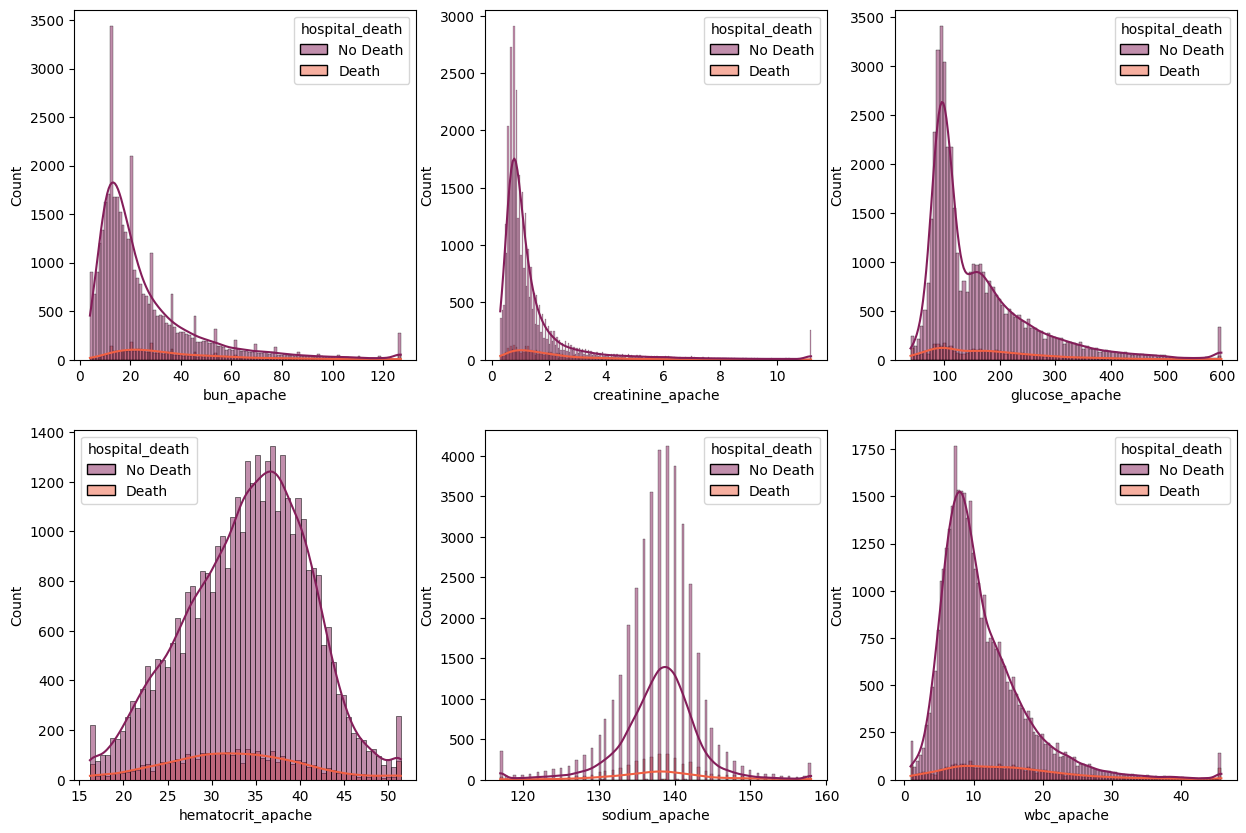

In [ ]:
# Can other missing variables be imputed w median/mean?
low_missing = missing_info.loc[(missing_info['Missing Percentage'] >= 10) & (missing_info['Missing Percentage'] < 50)].index.tolist()

len(low_missing) # 6

# checking the difference in distribution

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(low_missing):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_dscrpt, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

- fairly skewed distribution, can impute with median

In [ ]:
# Export dataset to shared drive
data.to_csv('data_clean.csv')
!cp data_clean.csv "/content/drive/MyDrive/Machine Learning /Datathon #4"

In [38]:
# Neutral Networks Library
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout
import io


In [147]:
from google.colab import files

uploaded = files.upload()

Saving data_clean.csv to data_clean (8).csv


In [148]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(io.BytesIO(uploaded['data_clean (8).csv']))


In [91]:
print(data.isna().sum())

apache_post_operative              0
arf_apache                         0
bun_apache                     10957
creatinine_apache              10828
gcs_eyes_apache                  454
gcs_motor_apache                 454
gcs_unable_apache                  0
gcs_verbal_apache                454
glucose_apache                  6412
heart_rate_apache                 50
hematocrit_apache              12614
intubated_apache                   0
map_apache                       126
resprate_apache                  302
sodium_apache                  10664
temp_apache                     2157
ventilated_apache                  0
wbc_apache                     13734
hospital_death                     0
age                             2320
bmi                             2091
gender                            24
aids                               0
cirrhosis                          0
diabetes_mellitus                  0
hepatic_failure                    0
immunosuppression                  0
l

In [149]:
data['bun_apache']=data['bun_apache'].fillna(data['bun_apache'].median())
data['creatinine_apache']=data['creatinine_apache'].fillna(data['creatinine_apache'].median())
data['gcs_eyes_apache']=data['gcs_eyes_apache'].fillna(data['gcs_eyes_apache'].median())
data['gcs_motor_apache']=data['gcs_motor_apache'].fillna(data['gcs_motor_apache'].median())
data['gcs_verbal_apache']=data['gcs_verbal_apache'].fillna(data['gcs_verbal_apache'].median())
data['glucose_apache']=data['glucose_apache'].fillna(data['glucose_apache'].median())
data['heart_rate_apache']=data['heart_rate_apache'].fillna(data['heart_rate_apache'].median())
data['hematocrit_apache']=data['hematocrit_apache'].fillna(data['hematocrit_apache'].median())
data['map_apache']=data['map_apache'].fillna(data['map_apache'].median())
data['resprate_apache']=data['resprate_apache'].fillna(data['resprate_apache'].median())
data['sodium_apache']=data['sodium_apache'].fillna(data['sodium_apache'].median())
data['temp_apache']=data['temp_apache'].fillna(data['temp_apache'].median())
data['wbc_apache']=data['wbc_apache'].fillna(data['wbc_apache'].median())
data['age']=data['age'].fillna(data['age'].median())
data['bmi']=data['bmi'].fillna(data['bmi'].median())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53598 entries, 0 to 53597
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apache_post_operative        53598 non-null  object 
 1   arf_apache                   53598 non-null  object 
 2   bun_apache                   53598 non-null  float64
 3   creatinine_apache            53598 non-null  float64
 4   gcs_eyes_apache              53598 non-null  float64
 5   gcs_motor_apache             53598 non-null  float64
 6   gcs_unable_apache            53598 non-null  object 
 7   gcs_verbal_apache            53598 non-null  float64
 8   glucose_apache               53598 non-null  float64
 9   heart_rate_apache            53598 non-null  float64
 10  hematocrit_apache            53598 non-null  float64
 11  intubated_apache             53598 non-null  object 
 12  map_apache                   53598 non-null  float64
 13  resprate_apache 

In [93]:
print(data.isna().sum())

apache_post_operative           0
arf_apache                      0
bun_apache                      0
creatinine_apache               0
gcs_eyes_apache                 0
gcs_motor_apache                0
gcs_unable_apache               0
gcs_verbal_apache               0
glucose_apache                  0
heart_rate_apache               0
hematocrit_apache               0
intubated_apache                0
map_apache                      0
resprate_apache                 0
sodium_apache                   0
temp_apache                     0
ventilated_apache               0
wbc_apache                      0
hospital_death                  0
age                             0
bmi                             0
gender                         24
aids                            0
cirrhosis                       0
diabetes_mellitus               0
hepatic_failure                 0
immunosuppression               0
leukemia                        0
lymphoma                        0
solid_tumor_wi

In [150]:
le = LabelEncoder()
data['apache_post_operative'] = le.fit_transform(data['apache_post_operative'])
data['arf_apache'] = le.fit_transform(data['arf_apache'])
data['intubated_apache'] = le.fit_transform(data['intubated_apache'])
data['gcs_unable_apache'] = le.fit_transform(data['gcs_unable_apache'])
data['ventilated_apache'] = le.fit_transform(data['ventilated_apache'])
data['aids'] = le.fit_transform(data['aids'])
data['cirrhosis'] = le.fit_transform(data['cirrhosis'])
data['diabetes_mellitus'] = le.fit_transform(data['diabetes_mellitus'])
data['hepatic_failure'] = le.fit_transform(data['hepatic_failure'])
data['immunosuppression'] = le.fit_transform(data['immunosuppression'])
data['leukemia'] = le.fit_transform(data['leukemia'])
data['lymphoma'] = le.fit_transform(data['lymphoma'])
data['solid_tumor_with_metastasis'] = le.fit_transform(data['solid_tumor_with_metastasis'])
data['ethnicity_African American'] = le.fit_transform(data['ethnicity_African American'])
data['ethnicity_Asian'] = le.fit_transform(data['ethnicity_Asian'])
data['ethnicity_Caucasian'] = le.fit_transform(data['ethnicity_Caucasian'])
data['ethnicity_Hispanic'] = le.fit_transform(data['ethnicity_Hispanic'])
data['ethnicity_Native American'] = le.fit_transform(data['ethnicity_Native American'])
data['ethnicity_Other/Unknown'] = le.fit_transform(data['ethnicity_Other/Unknown'])


In [151]:
data['gender'] = data['gender'].map({'F': 1, 'M': 0})
data['hospital_death'] = data['hospital_death'].map({'Death': 1, 'No Death': 0})
data.head()


,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,gender,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
0,0,0,19.0,1.00,3.0,6.0,0,5.0,124.0,102.0,34.5,0,68.0,37.0,138.0,36.7,0,9.8,0,25.0,31.950000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,13.0,0.71,4.0,6.0,0,5.0,156.0,113.0,44.2,0,130.0,35.0,137.0,36.6,0,10.9,0,67.0,27.560000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,18.0,0.78,4.0,6.0,0,5.0,197.0,133.0,33.5,1,138.0,53.0,135.0,35.0,1,5.9,0,59.0,57.450000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,48.0,2.05,4.0,6.0,0,5.0,164.0,120.0,22.6,0,60.0,28.0,140.0,36.6,1,12.8,0,70.0,27.426444,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,10.0,0.83,4.0,6.0,0,5.0,134.0,94.0,37.2,0,58.0,46.0,139.0,36.3,0,8.4,0,50.0,25.710000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:
data['hospital_death'].mean()

0.08617858875331169

In [153]:
print(data.isna().sum())

apache_post_operative          0
arf_apache                     0
bun_apache                     0
creatinine_apache              0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apache              0
gcs_verbal_apache              0
glucose_apache                 0
heart_rate_apache              0
hematocrit_apache              0
intubated_apache               0
map_apache                     0
resprate_apache                0
sodium_apache                  0
temp_apache                    0
ventilated_apache              0
wbc_apache                     0
hospital_death                 0
age                            0
bmi                            0
gender                         0
aids                           0
cirrhosis                      0
diabetes_mellitus              0
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
ethnicity_

In [99]:
data.dtypes

apache_post_operative           object
arf_apache                      object
bun_apache                     float64
creatinine_apache              float64
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_unable_apache               object
gcs_verbal_apache              float64
glucose_apache                 float64
heart_rate_apache              float64
hematocrit_apache              float64
intubated_apache                object
map_apache                     float64
resprate_apache                float64
sodium_apache                  float64
temp_apache                    float64
ventilated_apache               object
wbc_apache                     float64
hospital_death                   int64
age                            float64
bmi                            float64
aids                            object
cirrhosis                       object
diabetes_mellitus               object
hepatic_failure                 object
immunosuppression        

In [154]:
# Randomly sample 70% of the data for training
train_data = data.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = data.drop(train_data.index)

# Check the mean of the 'DEATH_EVENT' column in both training and testing data
train_data['hospital_death'].mean()
test_data['hospital_death'].mean()

# Data Preparation

# Extract the 'DEATH_EVENT' column as the target variable for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

# Extract the features (excluding 'DEATH_EVENT') for training and testing
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [155]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 32
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((35, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [156]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [160]:
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [161]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

# Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
# Forward pass: Compute predictions
        probs = forward(X)

# Compute the loss
        print(probs.view(-1))
        loss = loss_fn(probs.view(-1), Y)

# Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

# Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Streaming output truncated to the last 5000 lines.
tensor([0.0793, 0.0288, 0.0629, 0.0895, 0.0606, 0.0626, 0.0168, 0.0759, 0.0058,
        0.0218, 0.0163, 0.0217, 0.5535, 0.0217, 0.0058, 0.0058, 0.0793, 0.0606,
        0.0085, 0.3011, 0.1805, 0.0226, 0.0058, 0.0201, 0.0260, 0.0358, 0.0058,
        0.0288, 0.0606, 0.0377, 0.0058, 0.0606], grad_fn=<ViewBackward0>)
tensor([0.0603, 0.0771, 0.0058, 0.0603, 0.0603, 0.0603, 0.0603, 0.1960, 0.0058,
        0.0287, 0.0059, 0.0058, 0.0058, 0.0216, 0.0058, 0.0287, 0.0058, 0.1960,
        0.0058, 0.0058, 0.0287, 0.8100, 0.0058, 0.4564, 0.0058, 0.2551, 0.2787,
        0.0058, 0.1009, 0.0058, 0.0058, 0.0058], grad_fn=<ViewBackward0>)
tensor([0.0058, 0.0058, 0.0058, 0.0285, 0.0058, 0.0919, 0.0285, 0.2783, 0.0285,
        0.1001, 0.0285, 0.0058, 0.0602, 0.0602, 0.0058, 0.0216, 0.2450, 0.0058,
        0.0058, 0.0058, 0.0285, 0.2126, 0.0322, 0.0058, 0.0285, 0.0058, 0.0295,
        0.5512, 0.0285, 0.0058, 0.8098, 0.0285], grad_fn=<ViewBackward0>)
tensor(

KeyboardInterrupt: ignored

In [ ]:
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')